In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import zipfile

zip_file_path = '/content/drive/MyDrive/turkiye-is-bankasi-ml-challenge-5.zip'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall()
zip_ref.close()

In [ ]:
import pyarrow.parquet as pq

train_df = pd.read_parquet('/content/train_final.parquet')
test_df = pd.read_parquet('/content/test_final.parquet')
sample_sub_df = pd.read_parquet('/content/submission_sample_final.parquet')

In [ ]:
train_df

,id,month,n_seconds_1,n_seconds_2,n_seconds_3,carrier,devicebrand,feature_0,feature_1,feature_2,...,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
0,5beefd4d2bf4a4767e0df8108,10,5245.571,981.182,205.948,VODAFONE TR,Apple,-1.197737,1.113360,-1.123334,...,-2.613336,-2.032903,2.645719,-1.023478,1.658986,-1.559406,-2.161336,30,58,"menu2, menu4, menu5"
1,867285b116c063d5a8482f5be,10,5184.876,557.650,487.587,TURKCELL,samsung,-2.336352,2.567766,-0.494908,...,-0.983938,-1.453756,-0.021547,-0.195770,2.775513,-0.318980,-4.291473,21,45,"menu7, menu8, menu4"
2,c82a7cbd2e00d9b66c06bcadc,10,3835.618,3275.128,43.806,TURK TELEKOM,Redmi,-2.561455,2.061736,-0.184511,...,-1.668703,-3.599403,1.673868,0.631790,1.293131,-2.230909,-2.383524,19,61,"menu2, menu8, menu4"
3,f2d2b25073ccc298eced86897,10,3532.544,154.509,64.724,TURKCELL,samsung,-2.529918,3.358050,-0.851366,...,-1.861418,-1.219658,1.863495,0.213170,1.029710,-1.142185,-4.466191,2,41,"menu6, menu2, menu1"
4,7818c92a58af0f2cb7c361738,10,3344.192,787.896,715.115,VODAFONE TR,samsung,-2.922361,2.096124,0.060796,...,-0.142903,-1.875545,1.024499,-0.186423,-0.061626,-1.462175,-2.371206,23,85,"menu6, menu2, menu8"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94044,2e54f32ced9fae6ef802ceaa2,12,44.397,43.425,41.678,O2 - DE,HUAWEI,-1.531534,2.596604,0.340233,...,-1.484154,-1.988186,0.044385,0.863442,0.761354,1.073711,-3.560019,29,68,"menu2, menu8, menu4"
94045,6aa4ff0f6cc5ef4c2980b2862,12,44.331,43.977,40.620,TURKCELL,samsung,-1.268987,2.300487,0.231711,...,-0.632773,-1.624605,2.406462,-0.340132,-0.893553,-2.061401,-1.908158,25,43,"menu9, menu2, menu5"
94046,fa842185a0edd210845b78308,12,44.142,43.591,41.736,VODAFONE TR,Apple,-1.950039,2.805681,0.438200,...,0.184886,-3.477337,0.449427,0.445361,-0.495204,-0.955097,-3.843092,4,25,"menu6, menu2, menu4"
94047,db8f55b8499f8d8c05148240e,12,43.963,43.350,40.862,TURK TELEKOM,Redmi,-2.389140,2.358281,0.683524,...,-0.186062,-2.329308,0.864857,1.284815,-0.100755,-1.056479,-1.452037,25,60,"menu6, menu8, menu4"


In [ ]:
test_df

,id,month,n_seconds_1,n_seconds_2,n_seconds_3,carrier,devicebrand,feature_0,feature_1,feature_2,...,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
0,2e6105f5911256f4f6c4813ed,1,6893.544,246.854,242.636,VODAFONE TR,samsung,-1.723524,3.216489,-1.138474,...,-1.094519,-1.217407,-4.280456,1.512240,-2.306445,2.066388,0.844927,-1.026193,18,58
1,c56ad71dae0a5dbd3e7d36adc,1,4481.065,740.209,263.860,TURKCELL,Apple,-0.417275,2.024433,0.102952,...,1.806486,-3.477517,-2.064966,1.499805,1.284697,0.189269,-1.563224,-1.901654,3,35
2,4d02ea175f6581f0c6385311f,1,4340.702,2742.163,318.700,TURKCELL,samsung,-2.943294,2.769536,0.734942,...,1.759080,-2.038839,-2.067219,2.141083,0.055355,0.084739,-1.009925,-2.058473,7,50
3,3412d27a86c286ba078fa935c,1,4129.666,181.397,155.423,TURK TELEKOM,Apple,-2.346902,2.684752,0.168206,...,2.171847,-0.925040,-1.484278,0.666036,0.911519,0.616167,0.092304,-1.874706,22,47
4,0203b561f6f7e10eafa46eefa,1,3903.944,126.133,100.060,TURKCELL,POCO,-1.745354,2.355863,0.318961,...,-0.373413,-0.015773,-2.961445,1.301413,1.375090,-0.107355,0.924390,-1.606419,29,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11950,7687113f46112edf4f56666ee,1,47.726,40.879,40.647,TURKCELL,HUAWEI,-2.952961,1.352361,-0.396846,...,0.333993,-0.533786,-1.779781,0.228962,0.403641,-0.906588,-0.788647,-0.627803,18,45
11951,5ff8eb7a06fd48b60dbc04f34,1,47.471,44.745,41.040,TURKCELL,Apple,-1.945921,2.003634,-0.300293,...,1.468012,-1.345186,-1.067598,1.685431,0.879146,0.206344,-1.623952,-2.496700,20,44
11952,ac23a7b9ad3e5d61e738c854b,1,47.403,45.832,43.932,TURK TELEKOM,Redmi,-1.596234,3.165674,-1.520392,...,1.096878,-0.558995,-3.029989,1.352324,0.351689,-0.326579,-0.382071,-2.995726,17,34
11953,7da05018634ea2eee4b122756,1,46.044,43.592,40.735,TURK TELEKOM,samsung,-1.984582,2.382992,-1.060896,...,1.006593,-2.548628,-2.803372,1.091970,0.436466,0.235511,-1.625251,-2.354214,26,58


In [ ]:
def map_ids_to_indices(df):
    id_to_index = {}
    indices = []

    for i, k in enumerate(df["id"]):
        if k not in id_to_index:
            id_to_index[k] = len(id_to_index)

        indices.append(id_to_index[k])

    df["id"] = indices
    return df

train_df = map_ids_to_indices(train_df)
test_df = map_ids_to_indices(test_df)
train_df

,id,month,n_seconds_1,n_seconds_2,n_seconds_3,carrier,devicebrand,feature_0,feature_1,feature_2,...,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
0,0,10,5245.571,981.182,205.948,VODAFONE TR,Apple,-1.197737,1.113360,-1.123334,...,-2.613336,-2.032903,2.645719,-1.023478,1.658986,-1.559406,-2.161336,30,58,"menu2, menu4, menu5"
1,1,10,5184.876,557.650,487.587,TURKCELL,samsung,-2.336352,2.567766,-0.494908,...,-0.983938,-1.453756,-0.021547,-0.195770,2.775513,-0.318980,-4.291473,21,45,"menu7, menu8, menu4"
2,2,10,3835.618,3275.128,43.806,TURK TELEKOM,Redmi,-2.561455,2.061736,-0.184511,...,-1.668703,-3.599403,1.673868,0.631790,1.293131,-2.230909,-2.383524,19,61,"menu2, menu8, menu4"
3,3,10,3532.544,154.509,64.724,TURKCELL,samsung,-2.529918,3.358050,-0.851366,...,-1.861418,-1.219658,1.863495,0.213170,1.029710,-1.142185,-4.466191,2,41,"menu6, menu2, menu1"
4,4,10,3344.192,787.896,715.115,VODAFONE TR,samsung,-2.922361,2.096124,0.060796,...,-0.142903,-1.875545,1.024499,-0.186423,-0.061626,-1.462175,-2.371206,23,85,"menu6, menu2, menu8"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94044,80473,12,44.397,43.425,41.678,O2 - DE,HUAWEI,-1.531534,2.596604,0.340233,...,-1.484154,-1.988186,0.044385,0.863442,0.761354,1.073711,-3.560019,29,68,"menu2, menu8, menu4"
94045,80474,12,44.331,43.977,40.620,TURKCELL,samsung,-1.268987,2.300487,0.231711,...,-0.632773,-1.624605,2.406462,-0.340132,-0.893553,-2.061401,-1.908158,25,43,"menu9, menu2, menu5"
94046,80475,12,44.142,43.591,41.736,VODAFONE TR,Apple,-1.950039,2.805681,0.438200,...,0.184886,-3.477337,0.449427,0.445361,-0.495204,-0.955097,-3.843092,4,25,"menu6, menu2, menu4"
94047,80476,12,43.963,43.350,40.862,TURK TELEKOM,Redmi,-2.389140,2.358281,0.683524,...,-0.186062,-2.329308,0.864857,1.284815,-0.100755,-1.056479,-1.452037,25,60,"menu6, menu8, menu4"


In [ ]:
def map_carrier_to_numeric(carrier):
    if carrier == "VODAFONE TR":
        return 0
    elif carrier == "TURK TELEKOM":
        return 1
    elif carrier == "TURKCELL":
        return 2
    else:
        return 3

def map_carrier_column_to_numeric(df, column_name):
    new_carrier = df[column_name].apply(map_carrier_to_numeric)
    df[column_name] = new_carrier
    return df

# Kullanım örneği:
train_df = map_carrier_column_to_numeric(train_df, "carrier")
train_df = pd.get_dummies(train_df, columns=["carrier"], prefix=["carrier"])

test_df = map_carrier_column_to_numeric(test_df, "carrier")
test_df = pd.get_dummies(test_df, columns=["carrier"], prefix=["carrier"])

train_df

,id,month,n_seconds_1,n_seconds_2,n_seconds_3,devicebrand,feature_0,feature_1,feature_2,feature_3,...,feature_45,feature_46,feature_47,feature_48,feature_49,target,carrier_0,carrier_1,carrier_2,carrier_3
0,0,10,5245.571,981.182,205.948,Apple,-1.197737,1.113360,-1.123334,-0.263580,...,1.658986,-1.559406,-2.161336,30,58,"menu2, menu4, menu5",1,0,0,0
1,1,10,5184.876,557.650,487.587,samsung,-2.336352,2.567766,-0.494908,0.949101,...,2.775513,-0.318980,-4.291473,21,45,"menu7, menu8, menu4",0,0,1,0
2,2,10,3835.618,3275.128,43.806,Redmi,-2.561455,2.061736,-0.184511,1.062306,...,1.293131,-2.230909,-2.383524,19,61,"menu2, menu8, menu4",0,1,0,0
3,3,10,3532.544,154.509,64.724,samsung,-2.529918,3.358050,-0.851366,1.643876,...,1.029710,-1.142185,-4.466191,2,41,"menu6, menu2, menu1",0,0,1,0
4,4,10,3344.192,787.896,715.115,samsung,-2.922361,2.096124,0.060796,-1.487557,...,-0.061626,-1.462175,-2.371206,23,85,"menu6, menu2, menu8",1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94044,80473,12,44.397,43.425,41.678,HUAWEI,-1.531534,2.596604,0.340233,-1.149720,...,0.761354,1.073711,-3.560019,29,68,"menu2, menu8, menu4",0,0,0,1
94045,80474,12,44.331,43.977,40.620,samsung,-1.268987,2.300487,0.231711,0.741582,...,-0.893553,-2.061401,-1.908158,25,43,"menu9, menu2, menu5",0,0,1,0
94046,80475,12,44.142,43.591,41.736,Apple,-1.950039,2.805681,0.438200,2.976427,...,-0.495204,-0.955097,-3.843092,4,25,"menu6, menu2, menu4",1,0,0,0
94047,80476,12,43.963,43.350,40.862,Redmi,-2.389140,2.358281,0.683524,0.234449,...,-0.100755,-1.056479,-1.452037,25,60,"menu6, menu8, menu4",0,1,0,0


In [ ]:
def map_devicebrand_to_numeric(devicebrand):
    if devicebrand == "Apple":
        return 0
    elif devicebrand == "samsung":
        return 1
    elif devicebrand == "Redmi":
        return 2
    elif devicebrand == "HUAWEI":
        return 3
    elif devicebrand == "xiaomi":
        return 4
    elif devicebrand == "POCO":
        return 5
    elif devicebrand == "OPPO":
        return 6
    else:
        return 7

def map_devicebrand_column_to_numeric(df, column_name):
    new_devicebrand = df[column_name].apply(map_devicebrand_to_numeric)
    df[column_name] = new_devicebrand
    return df

train_df = map_devicebrand_column_to_numeric(train_df, "devicebrand")
train_df = pd.get_dummies(train_df, columns=["devicebrand"], prefix=["devicebrand"])

test_df = map_devicebrand_column_to_numeric(test_df, "devicebrand")
test_df = pd.get_dummies(test_df, columns=["devicebrand"], prefix=["devicebrand"])

train_df

,id,month,n_seconds_1,n_seconds_2,n_seconds_3,feature_0,feature_1,feature_2,feature_3,feature_4,...,carrier_2,carrier_3,devicebrand_0,devicebrand_1,devicebrand_2,devicebrand_3,devicebrand_4,devicebrand_5,devicebrand_6,devicebrand_7
0,0,10,5245.571,981.182,205.948,-1.197737,1.113360,-1.123334,-0.263580,2.161242,...,0,0,1,0,0,0,0,0,0,0
1,1,10,5184.876,557.650,487.587,-2.336352,2.567766,-0.494908,0.949101,3.567557,...,1,0,0,1,0,0,0,0,0,0
2,2,10,3835.618,3275.128,43.806,-2.561455,2.061736,-0.184511,1.062306,4.197788,...,0,0,0,0,1,0,0,0,0,0
3,3,10,3532.544,154.509,64.724,-2.529918,3.358050,-0.851366,1.643876,2.849205,...,1,0,0,1,0,0,0,0,0,0
4,4,10,3344.192,787.896,715.115,-2.922361,2.096124,0.060796,-1.487557,3.224788,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94044,80473,12,44.397,43.425,41.678,-1.531534,2.596604,0.340233,-1.149720,3.308406,...,0,1,0,0,0,1,0,0,0,0
94045,80474,12,44.331,43.977,40.620,-1.268987,2.300487,0.231711,0.741582,2.365813,...,1,0,0,1,0,0,0,0,0,0
94046,80475,12,44.142,43.591,41.736,-1.950039,2.805681,0.438200,2.976427,4.001829,...,0,0,1,0,0,0,0,0,0,0
94047,80476,12,43.963,43.350,40.862,-2.389140,2.358281,0.683524,0.234449,4.070453,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
unique_menus = ['menu1', 'menu2', 'menu3', 'menu4', 'menu5', 'menu6', 'menu7', 'menu8', 'menu9']

for menu in unique_menus:
    train_df[menu] = 0

for i, row in train_df.iterrows():
    menus = row['target'].split(', ')
    for menu in menus:
        if menu in unique_menus:
            train_df.loc[i, menu] = 1

train_df.drop(columns=['target'], inplace=True)

train_df

,id,month,n_seconds_1,n_seconds_2,n_seconds_3,feature_0,feature_1,feature_2,feature_3,feature_4,...,devicebrand_7,menu1,menu2,menu3,menu4,menu5,menu6,menu7,menu8,menu9
0,0,10,5245.571,981.182,205.948,-1.197737,1.113360,-1.123334,-0.263580,2.161242,...,0,0,1,0,1,1,0,0,0,0
1,1,10,5184.876,557.650,487.587,-2.336352,2.567766,-0.494908,0.949101,3.567557,...,0,0,0,0,1,0,0,1,1,0
2,2,10,3835.618,3275.128,43.806,-2.561455,2.061736,-0.184511,1.062306,4.197788,...,0,0,1,0,1,0,0,0,1,0
3,3,10,3532.544,154.509,64.724,-2.529918,3.358050,-0.851366,1.643876,2.849205,...,0,1,1,0,0,0,1,0,0,0
4,4,10,3344.192,787.896,715.115,-2.922361,2.096124,0.060796,-1.487557,3.224788,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94044,80473,12,44.397,43.425,41.678,-1.531534,2.596604,0.340233,-1.149720,3.308406,...,0,0,1,0,1,0,0,0,1,0
94045,80474,12,44.331,43.977,40.620,-1.268987,2.300487,0.231711,0.741582,2.365813,...,0,0,1,0,0,1,0,0,0,1
94046,80475,12,44.142,43.591,41.736,-1.950039,2.805681,0.438200,2.976427,4.001829,...,0,0,1,0,1,0,1,0,0,0
94047,80476,12,43.963,43.350,40.862,-2.389140,2.358281,0.683524,0.234449,4.070453,...,0,0,0,0,1,0,1,0,1,0


In [ ]:
train_df.describe()

,id,month,n_seconds_1,n_seconds_2,n_seconds_3,feature_0,feature_1,feature_2,feature_3,feature_4,...,devicebrand_7,menu1,menu2,menu3,menu4,menu5,menu6,menu7,menu8,menu9
count,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,...,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000
mean,37169.278865,11.311561,432.781818,197.904016,102.381759,-1.824932,1.948002,-0.014231,-0.270988,3.428983,...,0.053164,0.237674,0.793331,0.060064,0.412742,0.201002,0.691097,0.043935,0.311072,0.249083
std,23313.478277,0.732301,429.834018,169.474603,80.533643,0.706014,0.742521,0.855615,1.001878,0.886168,...,0.224361,0.425661,0.404918,0.237607,0.492330,0.400751,0.462043,0.204951,0.462935,0.432484
min,0.000000,10.000000,41.850000,40.231000,40.001000,-5.009604,-1.190684,-4.988702,-4.205721,-2.057158,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16590.000000,11.000000,181.540000,91.886000,53.746000,-2.290048,1.443627,-0.560076,-0.950880,2.891524,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,35586.000000,11.000000,306.947000,144.874000,75.415000,-1.840876,1.934019,0.005703,-0.337732,3.503459,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,56965.000000,12.000000,537.064000,241.504000,119.032000,-1.379623,2.431059,0.559322,0.330430,4.050990,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,80477.000000,12.000000,13567.046000,3275.128000,1476.077000,2.137354,6.574112,4.055067,5.021944,6.272530,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


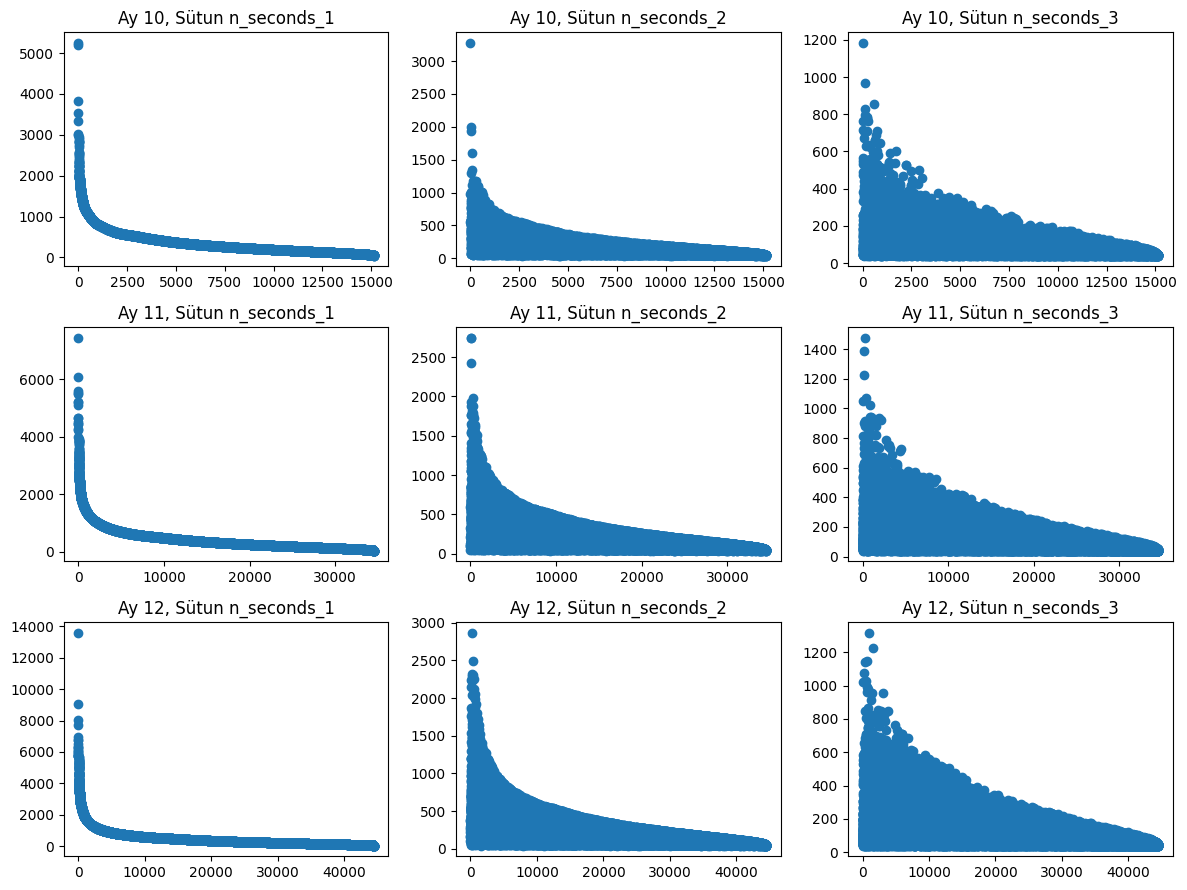

In [ ]:
months = [10, 11, 12]
columns = ["n_seconds_1", "n_seconds_2", "n_seconds_3"]

fig, axes = plt.subplots(len(months), len(columns), figsize=(12, 9))

for i, month in enumerate(months):
    for j, column in enumerate(columns):
        ax = axes[i][j]
        ax.scatter(range(len(train_df[train_df["month"] == month][column])), train_df[train_df["month"] == month][column])
        ax.set_title(f"Ay {month}, Sütun {column}")

plt.tight_layout()
plt.show()

In [ ]:
train_df["n_seconds_1"] = train_df["n_seconds_1"][train_df["n_seconds_1"] < 750]
train_df["n_seconds_2"] = train_df["n_seconds_2"][train_df["n_seconds_2"] < 300]
train_df["n_seconds_3"] = train_df["n_seconds_3"][train_df["n_seconds_3"] < 125]

train_df.dropna(how="any", inplace=True)
train_df

In [ ]:
train_df

,id,month,n_seconds_1,n_seconds_2,n_seconds_3,feature_0,feature_1,feature_2,feature_3,feature_4,...,devicebrand_7,menu1,menu2,menu3,menu4,menu5,menu6,menu7,menu8,menu9
0,0,10,NaN,NaN,NaN,-1.197737,1.113360,-1.123334,-0.263580,2.161242,...,0,0,1,0,1,1,0,0,0,0
1,1,10,NaN,NaN,NaN,-2.336352,2.567766,-0.494908,0.949101,3.567557,...,0,0,0,0,1,0,0,1,1,0
2,2,10,NaN,NaN,43.806,-2.561455,2.061736,-0.184511,1.062306,4.197788,...,0,0,1,0,1,0,0,0,1,0
3,3,10,NaN,154.509,64.724,-2.529918,3.358050,-0.851366,1.643876,2.849205,...,0,1,1,0,0,0,1,0,0,0
4,4,10,NaN,NaN,NaN,-2.922361,2.096124,0.060796,-1.487557,3.224788,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94044,80473,12,44.397,43.425,41.678,-1.531534,2.596604,0.340233,-1.149720,3.308406,...,0,0,1,0,1,0,0,0,1,0
94045,80474,12,44.331,43.977,40.620,-1.268987,2.300487,0.231711,0.741582,2.365813,...,0,0,1,0,0,1,0,0,0,1
94046,80475,12,44.142,43.591,41.736,-1.950039,2.805681,0.438200,2.976427,4.001829,...,0,0,1,0,1,0,1,0,0,0
94047,80476,12,43.963,43.350,40.862,-2.389140,2.358281,0.683524,0.234449,4.070453,...,0,0,0,0,1,0,1,0,1,0


In [ ]:
train_df.describe()

,id,month,n_seconds_1,n_seconds_2,n_seconds_3,feature_0,feature_1,feature_2,feature_3,feature_4,...,devicebrand_7,menu1,menu2,menu3,menu4,menu5,menu6,menu7,menu8,menu9
count,94049.000000,94049.000000,81699.000000,78016.000000,72476.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,...,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000
mean,37169.278865,11.311561,308.664423,138.124498,69.483679,-1.824932,1.948002,-0.014231,-0.270988,3.428983,...,0.053164,0.237674,0.793331,0.060064,0.412742,0.201002,0.691097,0.043935,0.311072,0.249083
std,23313.478277,0.732301,173.224276,65.166692,22.837090,0.706014,0.742521,0.855615,1.001878,0.886168,...,0.224361,0.425661,0.404918,0.237607,0.492330,0.400751,0.462043,0.204951,0.462935,0.432484
min,0.000000,10.000000,41.850000,40.231000,40.001000,-5.009604,-1.190684,-4.988702,-4.205721,-2.057158,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16590.000000,11.000000,167.280000,84.463000,50.128500,-2.290048,1.443627,-0.560076,-0.950880,2.891524,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,35586.000000,11.000000,268.848000,124.149500,63.941500,-1.840876,1.934019,0.005703,-0.337732,3.503459,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,56965.000000,12.000000,427.334000,182.105500,85.157250,-1.379623,2.431059,0.559322,0.330430,4.050990,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,80477.000000,12.000000,749.987000,299.991000,124.995000,2.137354,6.574112,4.055067,5.021944,6.272530,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
train_df.dropna(how="any", inplace=True)
train_df

,id,month,n_seconds_1,n_seconds_2,n_seconds_3,feature_0,feature_1,feature_2,feature_3,feature_4,...,devicebrand_7,menu1,menu2,menu3,menu4,menu5,menu6,menu7,menu8,menu9
1215,1215,10,749.699,54.656,40.658,-2.921755,1.748891,-0.439821,0.105449,3.462098,...,0,0,0,0,1,1,0,0,0,1
1216,1216,10,749.608,163.563,56.138,-3.358003,2.050894,-1.165811,-0.842854,3.205640,...,0,0,1,0,0,0,1,0,1,0
1224,1224,10,748.476,178.711,45.411,-2.119547,0.425568,1.346732,-2.268494,4.100910,...,0,0,1,0,1,0,1,0,0,0
1226,1226,10,748.249,73.184,72.420,-1.698547,2.208687,-2.028708,1.960378,1.366102,...,0,1,1,0,0,1,0,0,0,0
1227,1227,10,748.166,113.803,85.485,-1.925581,1.126886,-0.021944,-0.929779,5.217871,...,0,0,1,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94044,80473,12,44.397,43.425,41.678,-1.531534,2.596604,0.340233,-1.149720,3.308406,...,0,0,1,0,1,0,0,0,1,0
94045,80474,12,44.331,43.977,40.620,-1.268987,2.300487,0.231711,0.741582,2.365813,...,0,0,1,0,0,1,0,0,0,1
94046,80475,12,44.142,43.591,41.736,-1.950039,2.805681,0.438200,2.976427,4.001829,...,0,0,1,0,1,0,1,0,0,0
94047,80476,12,43.963,43.350,40.862,-2.389140,2.358281,0.683524,0.234449,4.070453,...,0,0,0,0,1,0,1,0,1,0


In [ ]:
train_df["n_seconds_1"] = train_df["n_seconds_1"]/60
train_df["n_seconds_2"] = train_df["n_seconds_2"]/60
train_df["n_seconds_3"] = train_df["n_seconds_3"]/60

In [ ]:
train_df.describe()

,id,month,n_seconds_1,n_seconds_2,n_seconds_3,feature_0,feature_1,feature_2,feature_3,feature_4,...,devicebrand_7,menu1,menu2,menu3,menu4,menu5,menu6,menu7,menu8,menu9
count,62481.000000,62481.000000,62481.000000,62481.000000,62481.000000,62481.000000,62481.000000,62481.000000,62481.000000,62481.000000,...,62481.000000,62481.000000,62481.000000,62481.000000,62481.000000,62481.000000,62481.000000,62481.000000,62481.000000,62481.00000
mean,40046.470927,11.271443,4.425564,2.039827,1.138566,-1.807691,1.919680,-0.007647,-0.315001,3.442789,...,0.049983,0.239385,0.772667,0.065140,0.446424,0.212016,0.694211,0.047342,0.265425,0.25739
std,24141.821622,0.748476,2.591257,0.951912,0.372874,0.701609,0.740984,0.850958,0.995053,0.879796,...,0.217912,0.426711,0.419113,0.246774,0.497125,0.408740,0.460744,0.212372,0.441563,0.43720
min,8.000000,10.000000,0.697500,0.670517,0.666683,-5.009604,-1.190684,-4.988702,-4.205721,-2.057158,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,19204.000000,11.000000,2.436817,1.303767,0.825583,-2.268974,1.419728,-0.552917,-0.990883,2.907486,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,38391.000000,11.000000,3.744900,1.820733,1.044300,-1.823666,1.904975,0.009430,-0.380113,3.519422,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000
75%,63298.000000,12.000000,5.778533,2.550917,1.385650,-1.364825,2.400269,0.563704,0.283569,4.057030,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.00000
max,80477.000000,12.000000,12.499167,4.998917,2.083167,2.137354,6.574112,4.055067,4.655862,6.250954,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [ ]:
from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = ["n_seconds_1","n_seconds_2","n_seconds_3",
                        "feature_0","feature_1","feature_2","feature_3","feature_4","feature_5",
                        "feature_6","feature_7","feature_8","feature_9","feature_10","feature_11",
                        "feature_12","feature_13","feature_14","feature_15","feature_16","feature_17",
                        "feature_18","feature_19","feature_20","feature_21","feature_22","feature_23",
                        "feature_24","feature_25","feature_26","feature_27","feature_28","feature_29",
                        "feature_30","feature_31","feature_32","feature_33","feature_34","feature_35",
                        "feature_36","feature_37","feature_38","feature_39","feature_40","feature_41",
                        "feature_42","feature_43","feature_44","feature_45","feature_46","feature_47",
                        "feature_48","feature_49"]

from sklearn.preprocessing import MinMaxScaler

def min_max_scale_dataframe(dataframe, columns_to_normalize):
    scaler = MinMaxScaler()
    dataframe[columns_to_normalize] = scaler.fit_transform(dataframe[columns_to_normalize])
    return dataframe

train_df = min_max_scale_dataframe(train_df, columns_to_normalize)
test_df = min_max_scale_dataframe(test_df, columns_to_normalize)

In [ ]:
duplicated_rows = train_df[train_df.duplicated()]
train_df = train_df.drop_duplicates()

In [ ]:
X = train_df.drop(columns=["id","month","n_seconds_1","n_seconds_2","n_seconds_3",'menu1', 'menu2', 'menu3', 'menu4', 'menu5', 'menu6', 'menu7', 'menu8', 'menu9'])
y = train_df[['menu1', 'menu2', 'menu3', 'menu4', 'menu5', 'menu6', 'menu7', 'menu8', 'menu9']]
y = y / 3

test_df = test_df.drop(columns=["id","month"])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y_train[:5]

,menu1,menu2,menu3,menu4,menu5,menu6,menu7,menu8,menu9
2932,0.0,0.333333,0.000000,0.000000,0.000000,0.333333,0.0,0.000000,0.333333
68412,0.0,0.333333,0.000000,0.333333,0.333333,0.000000,0.0,0.000000,0.000000
74377,0.0,0.333333,0.000000,0.000000,0.333333,0.000000,0.0,0.333333,0.000000
44770,0.0,0.333333,0.333333,0.000000,0.000000,0.333333,0.0,0.000000,0.000000
42182,0.0,0.333333,0.000000,0.333333,0.000000,0.000000,0.0,0.333333,0.000000


In [ ]:
X_train[:5]

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,carrier_2,carrier_3,devicebrand_0,devicebrand_1,devicebrand_2,devicebrand_3,devicebrand_4,devicebrand_5,devicebrand_6,devicebrand_7
2932,0.503892,0.287305,0.551298,0.386105,0.720322,0.335268,0.717977,0.521072,0.386138,0.434095,...,0,0,0,1,0,0,0,0,0,0
68412,0.412785,0.430099,0.685968,0.507310,0.536537,0.679048,0.695769,0.377339,0.551237,0.581552,...,0,0,1,0,0,0,0,0,0,0
74377,0.417672,0.476945,0.565658,0.435988,0.666149,0.544235,0.601886,0.404568,0.613947,0.655865,...,0,0,1,0,0,0,0,0,0,0
44770,0.309097,0.459376,0.511001,0.299301,0.627088,0.588422,0.542827,0.349869,0.613666,0.415142,...,0,1,0,1,0,0,0,0,0,0
42182,0.507865,0.304533,0.658198,0.370647,0.574343,0.291543,0.693837,0.282294,0.433802,0.601807,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
X_train.isnull().sum()

feature_0        0
feature_1        0
feature_2        0
feature_3        0
feature_4        0
                ..
devicebrand_3    0
devicebrand_4    0
devicebrand_5    0
devicebrand_6    0
devicebrand_7    0
Length: 62, dtype: int64

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train*3)

# Modeli kullanarak tahminler yapın
y_pred = clf.predict(X_test)
# Tahminlerin doğruluğunu değerlendirin
accuracy = accuracy_score(y_test*3, y_pred)
print("Doğruluk: {:.2f}%".format(accuracy * 100))

Doğruluk: 7.92%


In [ ]:
clf.feature_importances_

array([0.02235611, 0.01874526, 0.01690799, 0.0231575 , 0.01871865,
       0.02003095, 0.01838016, 0.01894343, 0.01667087, 0.01807047,
       0.02440919, 0.02043372, 0.02264135, 0.01998052, 0.01780567,
       0.01851213, 0.0230759 , 0.01885518, 0.02027015, 0.01969229,
       0.01693082, 0.0208883 , 0.01877415, 0.01961743, 0.02006771,
       0.0222953 , 0.02360687, 0.01766333, 0.01987404, 0.02461947,
       0.01773603, 0.02381318, 0.0185134 , 0.0184887 , 0.01853824,
       0.01747939, 0.01745916, 0.01894229, 0.02062431, 0.01772317,
       0.02007029, 0.02040237, 0.01814752, 0.02024972, 0.01759571,
       0.0178463 , 0.01771473, 0.01942456, 0.01741242, 0.01604822,
       0.0034336 , 0.00266899, 0.00351813, 0.00112827, 0.00378689,
       0.00342389, 0.00137195, 0.00119627, 0.00112338, 0.00026528,
       0.00077796, 0.00108078])

In [ ]:
X_train_reshaped = X_train.to_numpy().reshape(X_train.shape[0], 1, 62, 1)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(128, (3, 3), input_shape=(1, 62, 1), activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D((1, 1)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D((1, 1)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D((1, 1)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D((1, 1)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D((1, 1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(9, activation="softmax")
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-3 * 0.9 ** epoch  # You can adjust the learning rate schedule here
)

# Your code for reshaping and defining the model remains the same

model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[])

# Add the learning rate scheduler and early stopping callbacks to your training
history = model.fit(
    X_train_reshaped, y_train,
    epochs=10,
    batch_size=32,
    callbacks=[lr_schedule]  # Add both callbacks
)

Epoch 1/10
1562/1562 [==============================] - 21s 6ms/step - loss: 1.9387 - lr: 0.0010
Epoch 2/10
1562/1562 [==============================] - 8s 5ms/step - loss: 1.8952 - lr: 9.0000e-04
Epoch 3/10
1562/1562 [==============================] - 9s 6ms/step - loss: 1.8766 - lr: 8.1000e-04
Epoch 4/10
1562/1562 [==============================] - 9s 6ms/step - loss: 1.8701 - lr: 7.2900e-04
Epoch 5/10
1562/1562 [==============================] - 8s 5ms/step - loss: 1.8654 - lr: 6.5610e-04
Epoch 6/10
1562/1562 [==============================] - 9s 6ms/step - loss: 1.8618 - lr: 5.9049e-04
Epoch 7/10
1562/1562 [==============================] - 9s 5ms/step - loss: 1.8581 - lr: 5.3144e-04
Epoch 8/10
1562/1562 [==============================] - 9s 6ms/step - loss: 1.8545 - lr: 4.7830e-04
Epoch 9/10
1562/1562 [==============================] - 9s 6ms/step - loss: 1.8509 - lr: 4.3047e-04
Epoch 10/10
1562/1562 [==============================] - 8s 5ms/step - loss: 1.8474 - lr: 3.8742e-04


In [ ]:
preds = model.predict(X_test.to_numpy().reshape(X_test.shape[0], 1, 62, 1))

top3_indices = np.argsort(preds, axis=1)[:, -3:]
result = np.zeros_like(preds)
result[np.arange(result.shape[0])[:, np.newaxis], top3_indices] = 1
pd.DataFrame(result)

correct_rows = np.all(result == y_test*3, axis=1)
accuracy = np.sum(correct_rows) / len(correct_rows)
print("Accuracy:", accuracy)

391/391 [==============================] - 3s 7ms/step
Accuracy: 0.1501960470512923


In [ ]:
X_train_reshaped = X_train.to_numpy().reshape(X_train.shape[0], 1, 62, 1)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), input_shape=(1, 62, 1), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(24, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(40, (5, 5), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(80, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(112, (5, 5), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(192, (5, 5), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(320, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(1280, (1, 1), activation='relu', padding='same'),

    tf.keras.layers.MaxPool2D((1, 1)),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(9, activation="softmax")
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-3 * 0.9 ** epoch  # You can adjust the learning rate schedule here
)

# Your code for reshaping and defining the model remains the same

model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[])

# Add the learning rate scheduler and early stopping callbacks to your training
history = model.fit(
    X_train_reshaped, y_train,
    epochs=10,
    batch_size=32,
    callbacks=[lr_schedule]  # Add both callbacks
)

Epoch 1/10
1562/1562 [==============================] - 24s 11ms/step - loss: 1.9394 - lr: 0.0010
Epoch 2/10
1562/1562 [==============================] - 18s 12ms/step - loss: 1.9361 - lr: 9.0000e-04
Epoch 3/10
1562/1562 [==============================] - 18s 12ms/step - loss: 1.9355 - lr: 8.1000e-04
Epoch 4/10
1562/1562 [==============================] - 19s 12ms/step - loss: 1.9352 - lr: 7.2900e-04
Epoch 5/10
1562/1562 [==============================] - 19s 12ms/step - loss: 1.9351 - lr: 6.5610e-04
Epoch 6/10
1562/1562 [==============================] - 19s 12ms/step - loss: 1.9349 - lr: 5.9049e-04
Epoch 7/10
1562/1562 [==============================] - 19s 12ms/step - loss: 1.9348 - lr: 5.3144e-04
Epoch 8/10
1562/1562 [==============================] - 18s 12ms/step - loss: 1.9348 - lr: 4.7830e-04
Epoch 9/10
1562/1562 [==============================] - 19s 12ms/step - loss: 1.9348 - lr: 4.3047e-04
Epoch 10/10
1562/1562 [==============================] - 20s 13ms/step - loss: 1.9347 

In [ ]:
preds = model.predict(X_test.to_numpy().reshape(X_test.shape[0], 1, 62, 1))

top3_indices = np.argsort(preds, axis=1)[:, -3:]
result = np.zeros_like(preds)
result[np.arange(result.shape[0])[:, np.newaxis], top3_indices] = 1
pd.DataFrame(result)

correct_rows = np.all(result == y_test*3, axis=1)
accuracy = np.sum(correct_rows) / len(correct_rows)
print("Accuracy:", accuracy)

Accuracy: 0.1501960470512923


In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense

num_features = 62

num_classes = 9

def DecisionNodeLayer(num_units):
    return Dense(num_units, activation='tanh')

model = tf.keras.Sequential([
    Input(shape=(num_features,)),
    DecisionNodeLayer(2048),
    DecisionNodeLayer(1024),
    DecisionNodeLayer(512),
    DecisionNodeLayer(32),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 2048)              129024    
                                                                 
 dense_6 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_7 (Dense)             (None, 512)               524800    
                                                                 
 dense_8 (Dense)             (None, 32)                16416     
                                                                 
 dense_9 (Dense)             (None, 9)                 297       
                                                                 
Total params: 2768713 (10.56 MB)
Trainable params: 2768713 (10.56 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32
)

Epoch 1/10
1562/1562 [==============================] - 8s 4ms/step - loss: 1.9373
Epoch 2/10
1562/1562 [==============================] - 5s 3ms/step - loss: 1.9363
Epoch 3/10
1562/1562 [==============================] - 6s 4ms/step - loss: 1.9361
Epoch 4/10
1562/1562 [==============================] - 6s 4ms/step - loss: 1.9359
Epoch 5/10
1562/1562 [==============================] - 5s 3ms/step - loss: 1.9365
Epoch 6/10
1562/1562 [==============================] - 6s 4ms/step - loss: 1.9360
Epoch 7/10
1562/1562 [==============================] - 5s 3ms/step - loss: 1.9361
Epoch 8/10
1562/1562 [==============================] - 6s 4ms/step - loss: 1.9361
Epoch 9/10
1562/1562 [==============================] - 6s 4ms/step - loss: 1.9361
Epoch 10/10
1562/1562 [==============================] - 5s 3ms/step - loss: 1.9361


In [ ]:
preds = model.predict(X_test)
pd.DataFrame(preds)

391/391 [==============================] - 1s 2ms/step


,0,1,2,3,4,5,6,7,8
0,0.086277,0.254303,0.017798,0.149682,0.075567,0.220552,0.019542,0.08584,0.090441
1,0.086277,0.254303,0.017798,0.149682,0.075567,0.220552,0.019542,0.08584,0.090441
2,0.086277,0.254303,0.017798,0.149682,0.075567,0.220552,0.019542,0.08584,0.090441
3,0.086277,0.254303,0.017798,0.149682,0.075567,0.220552,0.019542,0.08584,0.090441
4,0.086277,0.254303,0.017798,0.149682,0.075567,0.220552,0.019542,0.08584,0.090441
...,...,...,...,...,...,...,...,...,...
12492,0.086277,0.254303,0.017798,0.149682,0.075567,0.220552,0.019542,0.08584,0.090441
12493,0.086277,0.254303,0.017798,0.149682,0.075567,0.220552,0.019542,0.08584,0.090441
12494,0.086277,0.254303,0.017798,0.149682,0.075567,0.220552,0.019542,0.08584,0.090441
12495,0.086277,0.254303,0.017798,0.149682,0.075567,0.220552,0.019542,0.08584,0.090441


In [ ]:
corr_mat = train_df.corr()
corr_mat

,id,month,n_seconds_1,n_seconds_2,n_seconds_3,feature_0,feature_1,feature_2,feature_3,feature_4,...,devicebrand_7,menu1,menu2,menu3,menu4,menu5,menu6,menu7,menu8,menu9
id,1.000000,0.774075,-0.226342,-0.117565,-0.067577,-0.081944,0.095328,-0.003059,0.186897,-0.004297,...,-0.022232,-0.051103,0.016251,0.050776,-0.049877,-0.025859,0.005576,-0.023397,0.121787,-0.030986
month,0.774075,1.000000,0.042350,0.040556,0.026902,-0.092656,0.139491,0.040055,0.215044,0.029379,...,-0.013121,-0.055974,0.010131,0.039967,-0.067720,-0.033681,0.037880,-0.045907,0.151645,-0.039927
n_seconds_1,-0.226342,0.042350,1.000000,0.439638,0.199142,-0.005254,0.020993,-0.008863,0.027774,-0.013575,...,0.006767,0.015152,0.039468,-0.018550,-0.067261,-0.036891,0.024607,-0.010422,0.065526,-0.018234
n_seconds_2,-0.117565,0.040556,0.439638,1.000000,0.433480,-0.010987,0.023976,-0.000062,0.023148,-0.004175,...,-0.001129,0.001771,0.045449,-0.025953,-0.059108,-0.027599,0.030378,-0.016570,0.042771,-0.004799
n_seconds_3,-0.067577,0.026902,0.199142,0.433480,1.000000,-0.015853,0.019212,0.020490,0.005632,0.004784,...,0.001599,-0.002412,0.011553,-0.026154,-0.027695,-0.009043,0.023664,-0.004105,0.014779,0.008116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
menu5,-0.025859,-0.033681,-0.036891,-0.027599,-0.009043,0.049599,0.009067,-0.035171,0.062407,0.052982,...,0.003212,-0.158857,-0.164390,-0.030451,-0.055277,1.000000,-0.206706,-0.054972,-0.188095,-0.107714
menu6,0.005576,0.037880,0.024607,0.030378,0.023664,0.053479,0.000831,-0.053921,0.013112,-0.053041,...,-0.026944,0.007871,-0.159254,-0.179117,-0.275918,-0.206706,1.000000,-0.047349,-0.113819,-0.162826
menu7,-0.023397,-0.045907,-0.010422,-0.016570,-0.004105,0.030142,-0.012896,-0.032147,-0.000293,0.013574,...,-0.004444,-0.067308,-0.101695,-0.039299,-0.082549,-0.054972,-0.047349,1.000000,-0.064025,-0.040571
menu8,0.121787,0.151645,0.065526,0.042771,0.014779,-0.140747,0.094611,0.053490,0.107077,-0.072973,...,-0.001151,-0.188657,0.018689,-0.075097,-0.243271,-0.188095,-0.113819,-0.064025,1.000000,-0.197861


In [ ]:
pd.DataFrame(y_test*3)

,menu1,menu2,menu3,menu4,menu5,menu6,menu7,menu8,menu9
41334,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
10293,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
22593,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
84731,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
87498,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
33353,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3828,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
85670,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
6775,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
top3_indices = np.argsort(preds, axis=1)[:, -3:]
result = np.zeros_like(preds)
result[np.arange(result.shape[0])[:, np.newaxis], top3_indices] = 1
pd.DataFrame(result)

correct_rows = np.all(result == y_test*3, axis=1)
accuracy = np.sum(correct_rows) / len(correct_rows)
print("Accuracy:", accuracy)

Accuracy: 0.1501960470512923


In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
ovr = OneVsRestClassifier(model)
ovr.fit(X_train, y_train*3)
yhat = ovr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
len(yhat)

12497

In [ ]:
correct_rows = np.all(yhat == y_test*3, axis=1)
accuracy = np.sum(correct_rows) / len(correct_rows)
print("Accuracy:", accuracy)

Accuracy: 0.11858846123069537


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2500, max_df=0.9)
vectorizer.fit(X_train)

TfidfVectorizer(max_df=0.9, max_features=2500)

In [ ]:
prediction = clf.predict(X_test)
prediction

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.]])

In [ ]:
correct_rows = np.all(prediction == y_test*3, axis=1)
accuracy = np.sum(correct_rows) / len(correct_rows)
print("Accuracy:", accuracy)

Accuracy: 0.07921901256301513
